## Bank personal loan modelling

Aim of the project: Building a model for predicting which customer will accept the offer for personal loan based on the features given in the dataset

Dataset used: [link to Kaggle](https://www.kaggle.com/pritech/bank-personal-loan-modelling)

Dataset description: 5000 customers and  14 variables

Variables description: **ID**; demographic variables: **Age**, **Experience**, **Income** (Annual income), **ZIP Code**, **Family**, **Education** (1 - undergraduate, 2 - graduate, 3- professional); variables describing customer's relationship with bank: **CCAvg (avg. spending on a credit card)**, **Mortgage** (value of house mortgage if any), **Personal loan** (Did the customer accept the personal loan offered in the last campaign?), **Securities Account** (Does the customer have a securities account with the bank?), **CD Account** (Does the customer have a certificate of deposit (CD) account with the bank?), **Online** (Does the customer use internet banking facilities?), **Credit Card** (Does the customer use a credit card issued by Universal Bank?)

### Importing and installing the necessary packages

In [ ]:
pip install pydotplus

In [ ]:
pip install six

In [ ]:
pip install graphviz

In [ ]:
conda install graphviz

In [ ]:
conda install python-graphviz

In [88]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

## Explanatory Data Analysis

In [89]:
# Loading dataframe
# df will be used for EDA, df2 will be used for modelling
df = pd.read_csv(r".../Bank_Personal_Loan_Modelling.csv", sep=";")

In [90]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [91]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The average client is 45 years old, has 20 years of professional experience, earns $46034 per year and has 1 family member

## Data preprocesssing

In [92]:
X = df.copy()
columns_to_drop = ['ID', 'ZIP Code', 'Personal Loan']
X = X.drop(columns_to_drop, axis=1)
display(X)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [93]:
y = df['Personal Loan']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [95]:
y_pred = tree.predict(X_test)

In [96]:
accuracy_score(y_test, y_pred)

0.984

In [97]:
tree.score(X_test, y_test)

0.984

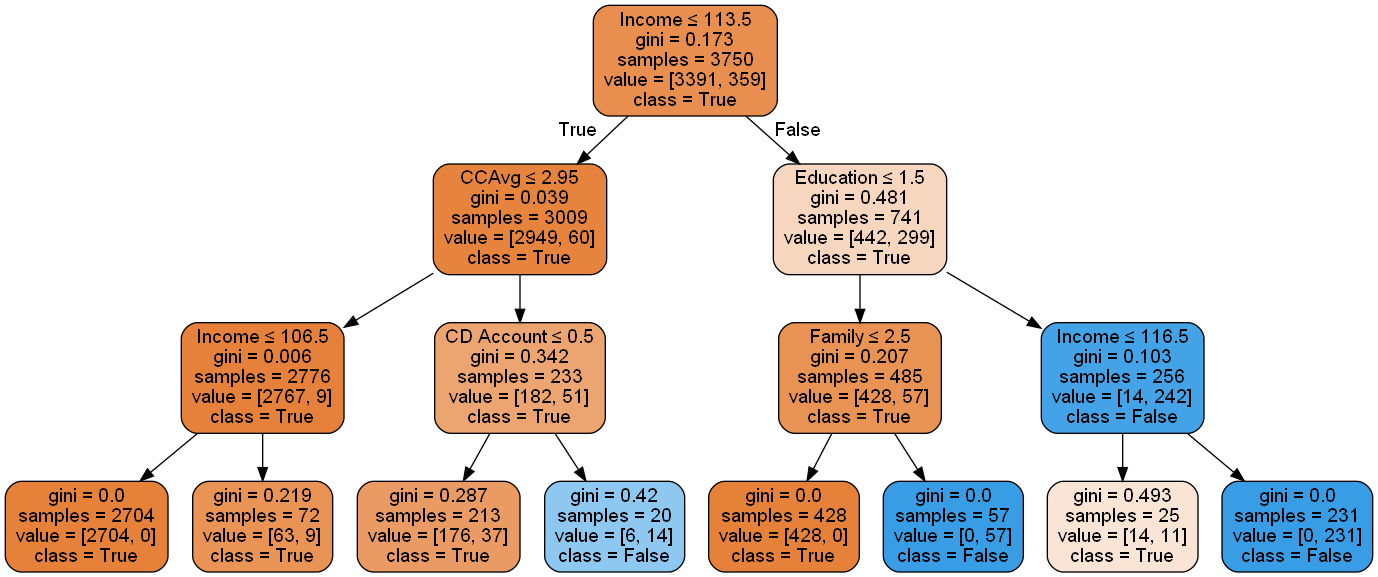

In [98]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=X.columns[:],
               class_names=['True', 'False'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('loans.png')
Image(graph.create_png())

## Interpretation

The decision tree above shows the possible decision rules for specific parameters (including eg. 3 levels of depth, Gini as the measure of impurity and 'best' strategy to choose the split at each node).

Ultimately, the goal is to minimize the Gini index. Then we can be sure of a very well-defined decision path.

For the created tree, the following factors were important in making the decision:
* **annual income**,
* **average spending on a credit card**,
* **having the certificate of deposit account with the bank** and
* **number of family members**.

An example path for a customer who accepted a loan offer in the previous campaign (the target variable) is:
* annual income not greater than 113.5 thousand USD, **then**
* years of education not greater than 1.5, **then**
* annual incomenot greater than 106.5 thousand USD.

The presented path is excellent according to the Gini index and the ending set of samples cannot be split again.